In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")



## Context
This dataset is designed to apply deep learning techniques to the field of medical science. By leveraging this dataset, we can build models that predict diseases based on a set of symptoms. The goal is to assist physicians in diagnosing diseases more efficiently and accurately, ultimately improving healthcare outcomes.

In [2]:
df = pd.read_csv('data/Training.csv')
dftest = pd.read_csv('data/Testing.csv')

In [3]:
print(df.shape)
print(df.info())

(4920, 134)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None


In [14]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
print(df.isnull().sum())


itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64


In [5]:
print(df.describe())

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593 

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None


### Deleted a null column

In [7]:
df = df.drop(df.columns[133], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [9]:
print(df.isnull().sum())

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


### Now it's Balanced so we can work with it in the model

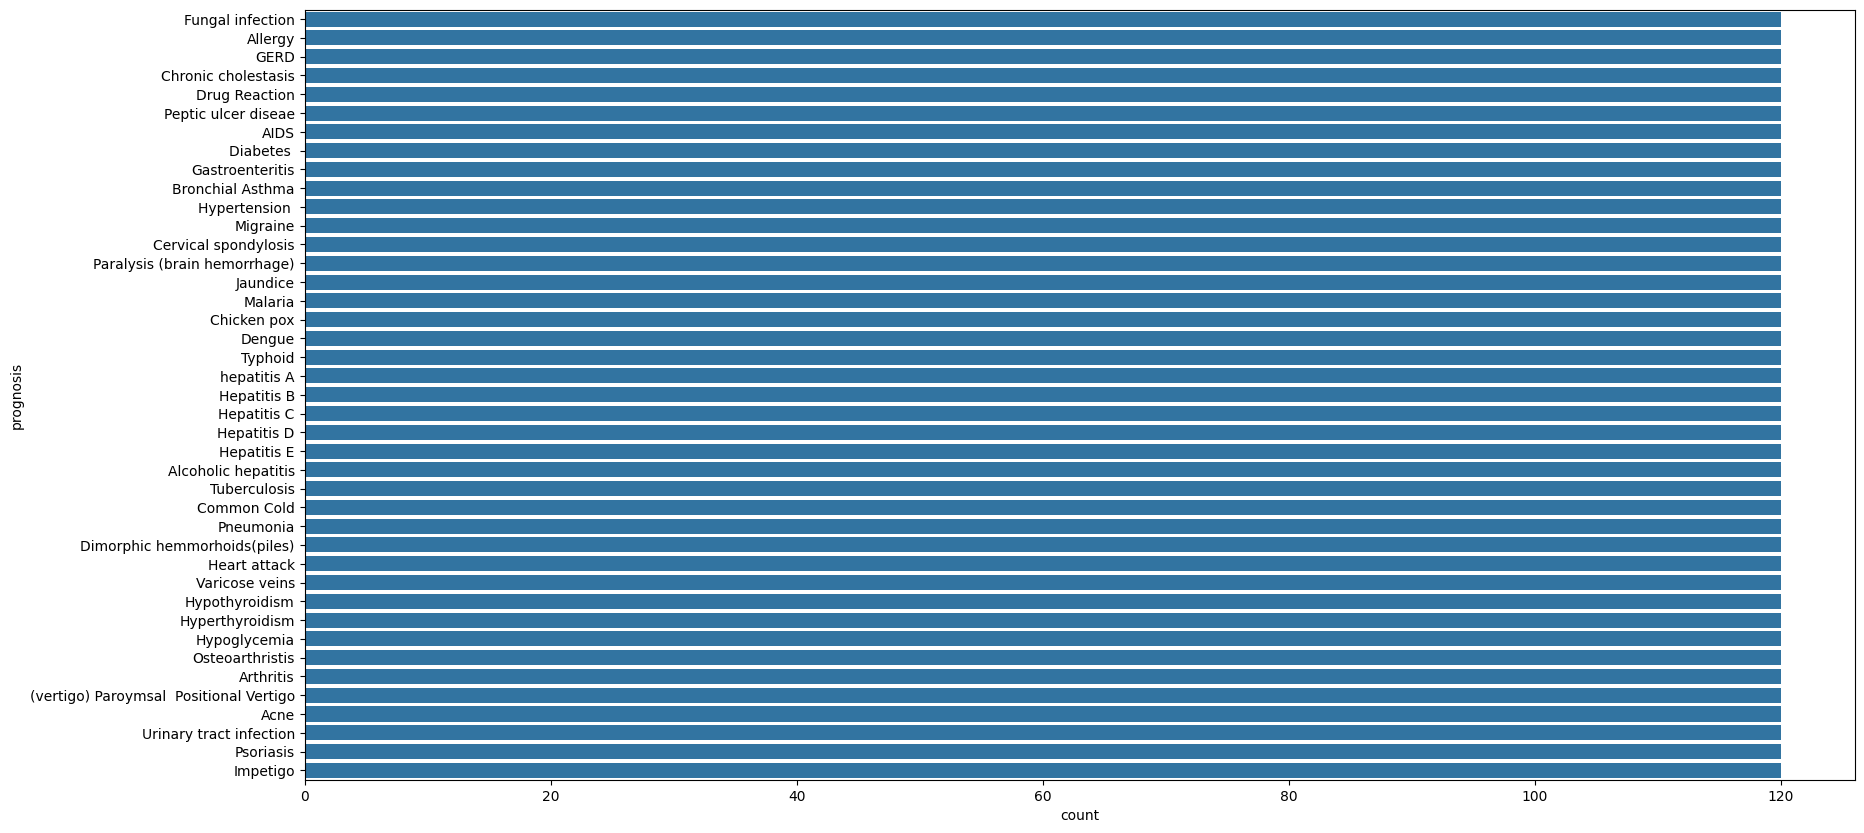

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,y='prognosis')
plt.show()

### Train and test splitting

In [15]:
X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

X_test = dftest.iloc[:, :-1].values
y_test = dftest.iloc[:, -1].values


### Change the answers to numerical values so we can use them

In [19]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

### Making the model and Evaluate it

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,activation='relu', input_shape=(132,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(42,activation='softmax')
])

In [23]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

In [31]:
history = model.fit(X_train,y_train, epochs =200,validation_data=(X_test, y_test))

Epoch 1/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.4423e-08 - val_accuracy: 0.9762 - val_loss: 0.1033
Epoch 2/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 1.0000 - loss: 2.3018e-08 - val_accuracy: 0.9762 - val_loss: 0.1032
Epoch 3/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 1.0000 - loss: 2.7016e-08 - val_accuracy: 0.9762 - val_loss: 0.1037
Epoch 4/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 1.0000 - loss: 2.0746e-08 - val_accuracy: 0.9762 - val_loss: 0.1049
Epoch 5/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 1.0000 - loss: 2.3542e-08 - val_accuracy: 0.9762 - val_loss: 0.1052
Epoch 6/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 1.0000 - loss: 1.5641e-08 - val_accuracy: 0.9762 - val_loss: 0.1056
Epoch 7/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 1.0000 - loss: 1.8950e-08 - val_accuracy: 0.9762 - val_loss: 0.1057
Epoch 8/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - 

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9841 - loss: 0.0687    
Test Accuracy: 0.976190447807312


In [27]:
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [28]:
predicted_diseases = label_encoder.inverse_transform(predicted_labels)

In [29]:
for i in range(len(predicted_diseases)):
    print(f"Predicted: {predicted_diseases[i]}, True: {label_encoder.inverse_transform([y_test[i]])[0]}")

Predicted: Fungal infection, True: Fungal infection
Predicted: Allergy, True: Allergy
Predicted: GERD, True: GERD
Predicted: Chronic cholestasis, True: Chronic cholestasis
Predicted: Drug Reaction, True: Drug Reaction
Predicted: Peptic ulcer diseae, True: Peptic ulcer diseae
Predicted: AIDS, True: AIDS
Predicted: Diabetes , True: Diabetes 
Predicted: Gastroenteritis, True: Gastroenteritis
Predicted: Bronchial Asthma, True: Bronchial Asthma
Predicted: Hypertension , True: Hypertension 
Predicted: Migraine, True: Migraine
Predicted: Cervical spondylosis, True: Cervical spondylosis
Predicted: Paralysis (brain hemorrhage), True: Paralysis (brain hemorrhage)
Predicted: Jaundice, True: Jaundice
Predicted: Malaria, True: Malaria
Predicted: Chicken pox, True: Chicken pox
Predicted: Dengue, True: Dengue
Predicted: Typhoid, True: Typhoid
Predicted: hepatitis A, True: hepatitis A
Predicted: Hepatitis B, True: Hepatitis B
Predicted: Hepatitis C, True: Hepatitis C
Predicted: Hepatitis D, True: Hepa

In [33]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)

In [34]:
model.save('disease_prediction_model.h5')